THE SPARKS FOUNDATION - Data Science & Business Analytics Internship

Task 1 :Prediction Using Supervised Learning .In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

STEP 1:Importing the dataset

In this steps we will import the dataset through the link with the help of some library .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Reading the data from the remote link
url="http://bit.ly/w-data"
ds=pd.read_csv(url)
print("Data imported sucessfully")
ds.head(11)

Data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's observe the dataset

In [4]:
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
ds.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
ds.shape

(25, 2)

Finding statistical properties of the data

In [7]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Now we will check if our dataset contains null or missing values
ds.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
#To find more information of the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


STEP-2 Visualizing the dataset

In this ,we will plot the dataset on 2-D Graph to check whether we can observe any relation between the two variables or not.

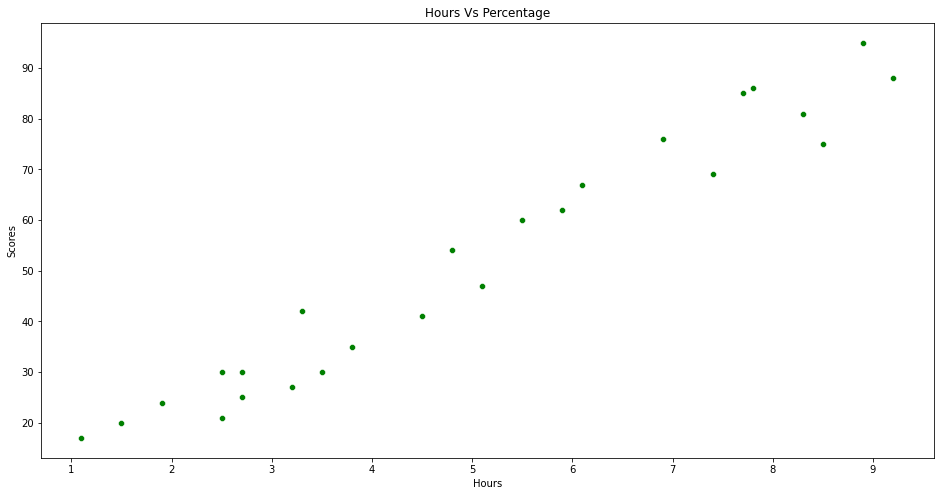

In [3]:
#ploting the scatterplot to analyze the relationship between variables.
plt.figure(figsize=(16, 8))
plt.title('Hours Vs Percentage')
sns.scatterplot(data=ds,x='Hours',y='Scores',color='green')

The above Scatterplot shows the relationship between Study Hours and their respective Scores, From the above graph we can conclude that as Study hours increasing then marks also increasing.

In [11]:
#To find the pairwise correlation between the variables
ds.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


STEP 3: In this step we will divide the data into "feature"(inputs) and "labels"(outputs).Then split thw dataset into 2 parts:-Testing data and Training data

In [12]:
#using iloc function we will divide the data
x=ds.iloc[:, :1].values
y=ds.iloc[:, 1:].values

STEP 4 -Training the Algorithm

Here we will train our training data part

In [13]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0 )

In [14]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [16]:
#Training linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

STEP 5- Visualizing the model

In [17]:
#predicting train and test data
test_pred=model.predict(x_test)
train_pred=model.predict(x_train)

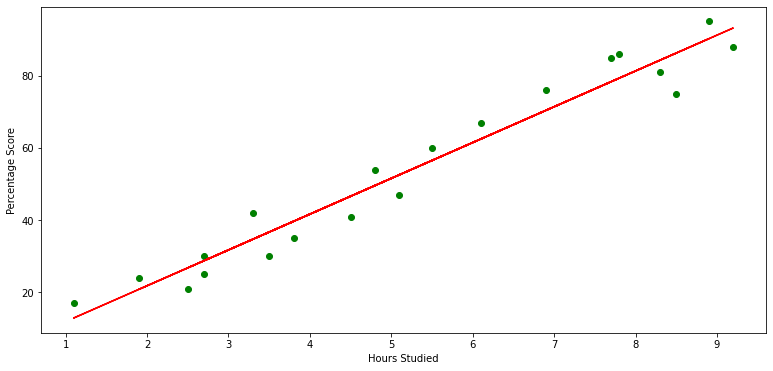

In [27]:
from pyparsing.helpers import col
#ploting the training data
plt.figure(figsize=(13, 6))
plt.scatter(x_train, y_train ,color='green')
plt.plot(x_train,train_pred, color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

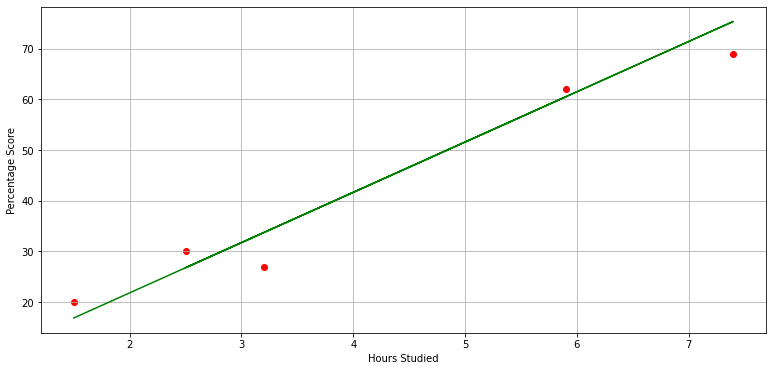

In [26]:
#ploting the test data
plt.figure(figsize=(13, 6))
plt.scatter(x_test, y_test ,color='red')
plt.plot(x_test,test_pred, color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

STEP-6 Making Predictions

In [23]:
#compare actual vs predicted value
test = pd.DataFrame({'Actual' : [y_test] , 'Prediction':[test_pred]})
test

,Actual,Prediction
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [24]:
#Testing with our own data
hours=9.25
own_pred=model.predict([[hours]])
print("The prediction score if a person studies for",hours,"hours is ",own_pred[0])

The prediction score if a person studies for 9.25 hours is  [93.69173249]


STEP 7:Evaluating the model

The final step is to evaluate the performance of algorithms.This step is particularly important to compare how well different algorithms perform on a particular dataset.For simplicity here ,we have chosen the mean square error.

In [25]:
#checking the  mean absolute error 
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,test_pred))


Mean Absolute Error : 4.183859899002982


KUNDAN SHARMA